In [1]:
import os
from matplotlib import pyplot as plt
import pandas as pd 
import numpy as np
import seaborn as sns 
import scipy.io
import librosa
import librosa.display
from glob import glob
import os
import tensorflow as tf
import IPython.display as ipd
from PIL import Image,ImageEnhance,ImageChops

In [2]:
#import os
#os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

In [3]:
def preprocess(file_path): 
    wav , sr = librosa.load(file_path,sr=16000)
    l=len(wav)
    wav = wav[:50000]
    zero_padding = tf.zeros([50000] - tf.shape(wav), dtype=tf.float32)
    wav = tf.concat([zero_padding, wav],0)
    spectrogram = tf.signal.stft(wav, frame_length=320, frame_step=32)
    spectrogram = tf.abs(spectrogram)
    spectrogram = tf.expand_dims(spectrogram, axis=2)
    return spectrogram , l

In [4]:
def autoAugment(x,n=1):
    img =Image.fromarray(np.uint8(tf.transpose(x)[0] * 255) , 'L')
    for i in (0,n):
        angle=np.random.randint(0,360)
        factor=np.random.randint(-2,2)
        enhancer = ImageEnhance.Contrast(img)
        img_aug=img.rotate(angle)
        img_aug=enhancer.enhance(factor)
        #img_aug=ImageChops.invert(img_aug)
        pix = np.array(img_aug,dtype='float32')
        pix/=255
        pix=tf.transpose(pix)
        pix=tf.expand_dims(pix, axis=2)
        #pix=tf.convert_to_tensor(pix)
    return pix    

In [5]:
GUITAR = os.path.join('Data', 'AudioEventDataset','train', 'acoustic_guitar')
#AIRPLANE = os.path.join('Data', 'AudioEventDataset','train', 'airplane')
APPLAUSE = os.path.join('Data', 'AudioEventDataset','train', 'applause')
#BIRD = os.path.join('Data', 'AudioEventDataset','train', 'bird')
KNOCK=os.path.join('Data','AudioEventDataset','train','knock')
#GLASS = os.path.join('Data', 'AudioEventDataset','train', 'glass_breaking')
#CAT = os.path.join('Data', 'AudioEventDataset','train', 'cat')
#CHILD = os.path.join('Data', 'AudioEventDataset','train', 'child')
#WATER= os.path.join('Data', 'AudioEventDataset','train', 'water_tap')
#CROWD = os.path.join('Data', 'AudioEventDataset','train', 'crowd')
DOG = os.path.join('Data', 'AudioEventDataset','train', 'dog_barking')
VIOLIN = os.path.join('Data', 'AudioEventDataset','train', 'violin')

In [6]:
lengths = []
extracted_features =[]
for track in glob(os.path.join(GUITAR, '*.wav')):
    data,l=preprocess(track)
    aug_data=autoAugment(data)
    extracted_features.append([aug_data,'acoustic'])
    extracted_features.append([data,"acoustic"])
    lengths.append(l)
    
#for track in glob(os.path.join(AIRPLANE, '*.wav')):
#    data,l=preprocess(track)
#    extracted_features.append([data,"airplane"])
#    lengths.append(l)
    
for track in glob(os.path.join(APPLAUSE, '*.wav')):
    data,l=preprocess(track)
    extracted_features.append([data,"applause"])
    lengths.append(l)
#
#for track in glob(os.path.join(GLASS, '*.wav')):
#    dadata,lta=preprocess(track)
#    aug_data=autoAugment(data)
#    extracted_features.append([aug_data,'glass'])
#    aug_data=autoAugment(data)
#    extracted_features.append([aug_data,'glass'])
#    extracted_features.append([data,"glass"])
#    lengths.append(l)

for track in glob(os.path.join(KNOCK, '*.wav')):
     data,l=preprocess(track)
     aug_data=autoAugment(data)
     extracted_features.append([aug_data,'knock'])
     aug_data=autoAugment(data)
     extracted_features.append([aug_data,'knock'])
     extracted_features.append([data,"knock"])
     lengths.append(l)

#for track in glob(os.path.join(CAT, '*.wav')):
#     data,l=preprocess(track)
#     aug_data=autoAugment(data)
#     extracted_features.append([aug_data,'cat'])
#     extracted_features.append([data,"cat"])
#     lengths.append(l)
    
#for track in glob(os.path.join(CHILD, '*.wav')):
#    data,l=preprocess(track)
#    extracted_features.append([data,"child"])
#    lengths.append(l)
    
#for track in glob(os.path.join(WATER, '*.wav')):
#    data,l=preprocess(track)
#    aug_data=autoAugment(data)
#    extracted_features.append([aug_data,'water'])
#    extracted_features.append([data,"water"])
#    lengths.append(l)
    
#for track in glob(os.path.join(CROWD, '*.wav')):
#     data,l=preprocess(track)
#     extracted_features.append([data,"crowd"])
#     lengths.append(l)
    
for track in glob(os.path.join(DOG, '*.wav')):
    data,l=preprocess(track)
    aug_data=autoAugment(data)
    extracted_features.append([aug_data,'dog'])
    aug_data=autoAugment(data)
    extracted_features.append([aug_data,'dog'])
    extracted_features.append([data,"dog"])
    lengths.append(l)
    
for track in glob(os.path.join(VIOLIN, '*.wav')):
    data,l=preprocess(track)
    aug_data=autoAugment(data)
    extracted_features.append([aug_data,'violin'])
    aug_data=autoAugment(data)
    extracted_features.append([aug_data,'violin'])
    extracted_features.append([data,"violin"])
    lengths.append(l)

In [7]:
wav,l=preprocess(GUITAR+'\\acoustic_guitar_0.wav')

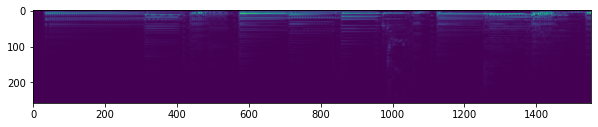

In [8]:
plt.figure(figsize=(10,20))
plt.imshow(tf.transpose(wav)[0])
plt.show()

In [9]:
wav.shape

TensorShape([1553, 257, 1])

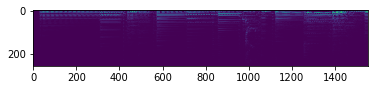

In [10]:
plt.imshow(tf.transpose(wav)[0], interpolation='nearest')
plt.show()

In [11]:
wav=wav.numpy()

In [12]:
img =Image.fromarray(np.uint8(tf.transpose(wav)[0] * 255) , 'L')
img.save('image_wave.jpeg')

In [13]:
random=np.random.randint(0,360)
img_rotate=img.rotate(random)
img_rotate.save('image_wave_rotate.jpeg')

In [14]:
img_inverted=ImageChops.invert(img)
img_inverted.save('image_wave_inverted.jpeg')

In [15]:
enhancer = ImageEnhance.Contrast(img)
img_contrast=enhancer.enhance(2)
img_contrast.save('image_wave_contrast.jpeg')

In [16]:
#
#pix = np.array(img)
#pix=tf.expand_dims(pix, axis=2)

In [17]:
#plt.figure(figsize=(30,49))
#plt.imshow(pix)
#plt.show()

In [18]:
#enhancer = ImageEnhance.Contrast(img)

In [19]:
#contrast
#img3=enhancer.enhance(10)
#img3.show()

In [20]:
#invert
#img4=ImageChops.invert(img)
#img4.show()

In [21]:
#pix = np.array(img3)
#pix=tf.expand_dims(pix, axis=2)

In [22]:
#plt.figure(figsize=(30,49))
#plt.imshow(pix)
#plt.show()

In [23]:
#angle=np.random.randint(0,360)
#angle

In [24]:
#augmented_data=[]
#for e in extracted_features:
#    d_aug=autoAugment(e[0])
#    augmented_data.append([d_aug,e[1]])

In [25]:
#augmented_data_df=pd.DataFrame(augmented_data,columns=['features','class'])
#augmented_data_df.head()

In [26]:
extracted_features_df=pd.DataFrame(extracted_features,columns=['features','class'])
#extracted_features_df.head()

In [27]:
#all_date=pd.concat([extracted_features_df,augmented_data_df],axis=0)

In [28]:
#all_date

In [29]:
#split the dataset into independent and dependent dataset 
X=np.array(extracted_features_df['features'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [30]:
#label encoding 
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [31]:
#splitting data 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size=0.2,
                                                    random_state=0)

In [32]:
X_train.shape

(1060, 1553, 257, 1)

In [33]:
#Number of classes
num_classes=y.shape[1]

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Dropout ,Activation,Flatten , Conv2D , MaxPooling2D
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

model = Sequential()
model.add(Conv2D(16, (3,3), activation='relu', input_shape=(1553, 257,1)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(16, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 1551, 255, 16)     160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 775, 127, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 773, 125, 16)      2320      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 386, 62, 16)       0         
_________________________________________________________________
flatten (Flatten)            (None, 382912)            0         
_________________________________________________________________
dense (Dense)                (None, 128)               49012864  
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 6

In [36]:
model.compile(loss='categorical_crossentropy',metrics=[tf.keras.metrics.Recall(),tf.keras.metrics.Precision()],optimizer='adam')

In [37]:
##Training the model 
from datetime import datetime

num_epochs=10
num_batch_size=4
start = datetime.now()

hist=model.fit(X_train,y_train,batch_size=num_batch_size,epochs=num_epochs,validation_data=(X_test,y_test))
duration=datetime.now() - start 
print("Training completed in time :",duration)

Epoch 1/10
265/265 [==============================] - 18s 40ms/step - loss: 1.5420 - recall: 0.5245 - precision: 0.7909 - val_loss: 0.6482 - val_recall: 0.6880 - val_precision: 0.8756
Epoch 2/10
265/265 [==============================] - 10s 37ms/step - loss: 0.6402 - recall: 0.7396 - precision: 0.8991 - val_loss: 0.6743 - val_recall: 0.6391 - val_precision: 0.8252
Epoch 3/10
265/265 [==============================] - 10s 37ms/step - loss: 0.4104 - recall: 0.8000 - precision: 0.9258 - val_loss: 0.6990 - val_recall: 0.7594 - val_precision: 0.8632
Epoch 4/10
265/265 [==============================] - 10s 37ms/step - loss: 0.3247 - recall: 0.8406 - precision: 0.9499 - val_loss: 0.4614 - val_recall: 0.7444 - val_precision: 0.9124
Epoch 5/10
265/265 [==============================] - 10s 37ms/step - loss: 0.2605 - recall: 0.8443 - precision: 0.9624 - val_loss: 0.6710 - val_recall: 0.7970 - val_precision: 0.8870
Epoch 6/10
265/265 [==============================] - 10s 37ms/step - loss: 0.21

In [38]:
#res=tf.concat(axis=1,values=[extracted_features, augmented_data])

In [39]:
#TEST the model on New Data
test_data_path=os.path.join('Data', 'AudioEventDataset','test', 'tracks')
testing_data =[]
for file in os.listdir(os.path.join(test_data_path)):
    FILEPATH=os.path.join(test_data_path,file)
    data,_=preprocess(FILEPATH)
    file=file.split("_")
    testing_data.append([data,file[0]])

In [40]:
testing_data=pd.DataFrame(testing_data,columns=['features','class'])

In [41]:
x_test_data=np.array(testing_data['features'].tolist())
y_test_data=np.array(testing_data['class'].tolist())
labelencoder=LabelEncoder()
y_test_data=to_categorical(labelencoder.fit_transform(y_test_data))

In [46]:
test_accuracy=model.evaluate(x_test_data,y_test_data)
test_accuracy

7/7 [==============================] - 0s 59ms/step - loss: 0.8673 - recall: 0.9196 - precision: 0.9196


[0.8672915697097778, 0.9196428656578064, 0.9196428656578064]

In [43]:
hist.history

{'loss': [1.5420290231704712,
  0.6401914358139038,
  0.41040897369384766,
  0.32467976212501526,
  0.2605229318141937,
  0.21163073182106018,
  0.29528188705444336,
  0.2141958624124527,
  0.3042961657047272,
  0.17925560474395752],
 'recall': [0.5245283246040344,
  0.7396226525306702,
  0.800000011920929,
  0.8405660390853882,
  0.8443396091461182,
  0.8716981410980225,
  0.8603773713111877,
  0.8688679337501526,
  0.8566038012504578,
  0.8745282888412476],
 'precision': [0.7908961772918701,
  0.8990825414657593,
  0.9257642030715942,
  0.9498934149742126,
  0.9623655676841736,
  0.9695698022842407,
  0.9712460041046143,
  0.9850267171859741,
  0.9649309515953064,
  0.9903846383094788],
 'val_loss': [0.6482353210449219,
  0.6743051409721375,
  0.6990355253219604,
  0.461377888917923,
  0.6710270643234253,
  0.8080896139144897,
  0.49611181020736694,
  0.5962717533111572,
  0.8442556262016296,
  0.7500524520874023],
 'val_recall': [0.6879699230194092,
  0.6390977501869202,
  0.7593985

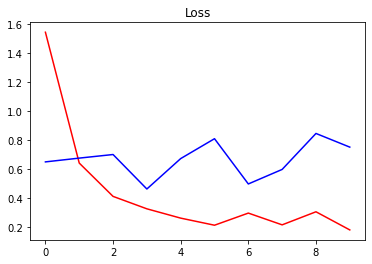

In [44]:
plt.title('Loss')
plt.plot(hist.history['loss'], 'r')
plt.plot(hist.history['val_loss'], 'b')
plt.show()

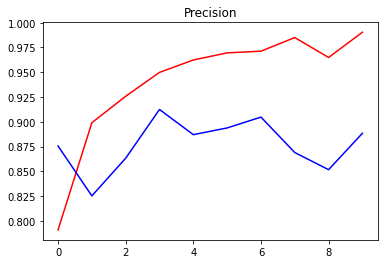

In [47]:
plt.title('Precision')
plt.plot(hist.history['precision'], 'r')
plt.plot(hist.history['val_precision'], 'b')
plt.show()

In [ ]:
classes=list(np.unique(df['class']))
class_dist=df.groupby(['class'])['length'].mean()